In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('seaice.csv')

# Exploratory Data Analysis

In [5]:
print df.head()

   Year  Month  Day  Extent  Missing  \
0  1978     10   26  10.231      0.0   
1  1978     10   28  10.420      0.0   
2  1978     10   30  10.557      0.0   
3  1978     11    1  10.670      0.0   
4  1978     11    3  10.777      0.0   

                                         Source Data hemisphere  
0  ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      north  
1  ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      north  
2  ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      north  
3  ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      north  
4  ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      north  


In [6]:
print df.tail()

       Year  Month  Day  Extent  Missing  \
24903  2017      6    3  10.996      0.0   
24904  2017      6    4  11.159      0.0   
24905  2017      6    5  11.307      0.0   
24906  2017      6    6  11.431      0.0   
24907  2017      6    7  11.580      0.0   

                                             Source Data hemisphere  
24903  ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      south  
24904  ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      south  
24905  ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      south  
24906  ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      south  
24907  ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      south  


In [7]:
print df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24908 entries, 0 to 24907
Data columns (total 7 columns):
Year           24908 non-null int64
Month          24908 non-null int64
Day            24908 non-null int64
Extent         24908 non-null float64
Missing        24908 non-null float64
Source Data    24908 non-null object
hemisphere     24908 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 1.1+ MB
None


# Обработка файла

## Объединим колонки с датой и временем в одну, присвоим ей индекс.

In [8]:
df2 = pd.read_csv('seaice.csv', parse_dates=[[0,1,2]], index_col='Year_Month_Day')

In [9]:
print df2.head()

                Extent  Missing  \
Year_Month_Day                    
1978-10-26      10.231      0.0   
1978-10-28      10.420      0.0   
1978-10-30      10.557      0.0   
1978-11-01      10.670      0.0   
1978-11-03      10.777      0.0   

                                                      Source Data hemisphere  
Year_Month_Day                                                                
1978-10-26      ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      north  
1978-10-28      ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      north  
1978-10-30      ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      north  
1978-11-01      ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      north  
1978-11-03      ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      north  


## Удалим лишние колонки

In [10]:
df3 = df2.drop(['Source Data', 'Missing'], axis='columns')

## Переименуем колонку с индексом

In [11]:
df3.index.name = 'Date'

In [12]:
print(df3.head())

            Extent hemisphere
Date                         
1978-10-26  10.231      north
1978-10-28  10.420      north
1978-10-30  10.557      north
1978-11-01  10.670      north
1978-11-03  10.777      north


# Анализ данных

## Сделаем срезы для Северного и Южного полушария

In [13]:
df3_north = df3[df3['hemisphere']=='north']

In [14]:
print df3_north.head()

            Extent hemisphere
Date                         
1978-10-26  10.231      north
1978-10-28  10.420      north
1978-10-30  10.557      north
1978-11-01  10.670      north
1978-11-03  10.777      north


In [15]:
df3_south = df3[df3['hemisphere']=='south']

In [16]:
print df3_south.head()

            Extent hemisphere
Date                         
1978-10-26  17.624      south
1978-10-28  17.803      south
1978-10-30  17.670      south
1978-11-01  17.527      south
1978-11-03  17.486      south


## Построим графики изменения площади льда во времени

In [17]:
df3_north['Extent'].plot(title='Sea ice extent in the Northern hemisphere')

In [18]:
plt.ylabel('Square of sea ice, 10^6 sq.km.')

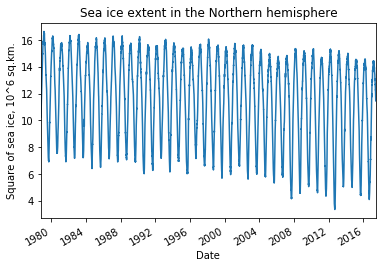

In [19]:
plt.show()

In [20]:
df3_south['Extent'].plot(title='Sea ice extent in the Southern hemisphere')

In [21]:
plt.ylabel('Square of sea ice, 10^6 sq.km.')

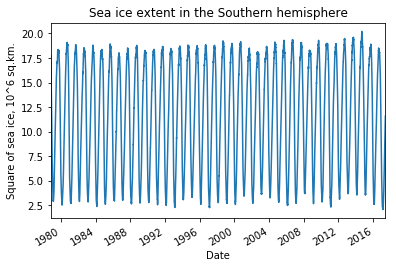

In [22]:
plt.show()

In [23]:
plt.figure()

In [24]:
df3_north['Extent'].plot()

In [25]:
df3_south['Extent'].plot()

In [26]:
plt.ylabel('Square of sea ice, 10^6 sq.km.')

In [27]:
plt.title('Sea ice extent dynamics in the Northern and in the Southern hemisphere', fontsize=14)

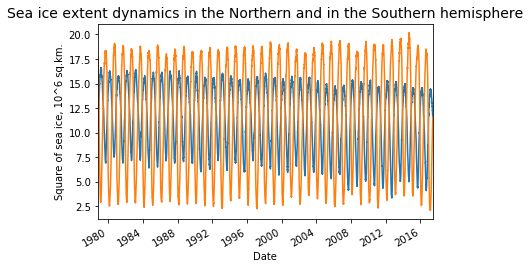

In [28]:
plt.show()

### Максимумы и минимумы льда в Северном и Южном полушариях приходятся на разное время года из-за смены сезонов. 
### Вывод 1: в Южном полушарии льда больше, чем в Северном.

## Для выявления тенденции выясним, как ведут себя среднегодовые показатели

In [29]:
df3_north_annually = df3_north.resample('A').mean()

In [30]:
df3_south_annually = df3_south.resample('A').mean()

In [31]:
plt.figure()

In [32]:
df3_north_annually['Extent']['1979':'2016'].plot()

In [33]:
df3_south_annually['Extent']['1979':'2016'].plot()

In [34]:
plt.title('Average sea ice extent')

In [35]:
plt.ylabel('Square of sea ice, 10^6 sq.km.')

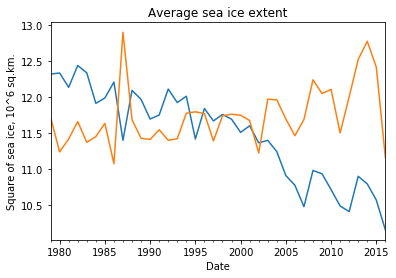

In [36]:
plt.show()

### Вывод №2: Площадь льда в Северном полушарии уменьшается со временем. 
### В Южном полушарии с 2000-х гг. площадь льда в среднем увеличивается.